In [53]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt 

In [54]:
# assume real model is w = [2,-3.4] , b = 4.2 and there's noise

In [55]:
def synthetic_data(w,b,num_examples):
    """generate y = Xw + b + noise"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [56]:
features

tensor([[ 1.2541, -0.3862],
        [ 0.0245,  1.6226],
        [ 0.0765,  0.5383],
        ...,
        [-2.0536, -1.3614],
        [ 1.3835,  1.6837],
        [ 1.2274, -0.3782]])

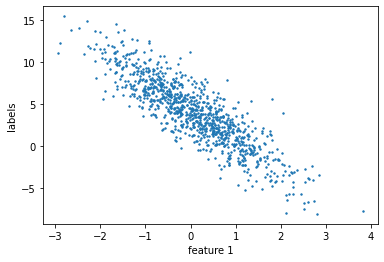

In [57]:
plt.figure()
plt.xlabel("feature 1")
plt.ylabel("labels")
plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),
           s = 2) 
plt.show()

In [78]:
[range(10)]

[range(0, 10)]

In [61]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10
for X,y in data_iter(batch_size, features ,labels):
    print(X,'\n', y)
    
    

tensor([[-0.7173, -0.5528],
        [-0.5105,  0.3419],
        [ 2.4664, -0.9186],
        [-0.8202,  1.4644],
        [-2.0931, -1.0459],
        [-0.9075, -0.8819],
        [ 2.1748, -1.1830],
        [ 1.7186,  1.5962],
        [ 0.9068,  2.0191],
        [-1.6427,  0.1868]]) 
 tensor([[ 4.6468],
        [ 2.0038],
        [12.2493],
        [-2.4122],
        [ 3.5761],
        [ 5.3792],
        [12.5723],
        [ 2.2050],
        [-0.8440],
        [ 0.2821]])
tensor([[ 0.2109,  1.4021],
        [-0.3139,  0.3250],
        [-0.0139,  0.1965],
        [ 0.3178,  1.5285],
        [-0.0167,  0.4300],
        [-0.7381, -1.2139],
        [ 1.1869,  0.8333],
        [-2.0456,  0.1564],
        [ 0.0591,  1.6910],
        [ 0.5393, -1.0579]]) 
 tensor([[-0.1436],
        [ 2.4829],
        [ 3.5134],
        [-0.3616],
        [ 2.7256],
        [ 6.8370],
        [ 3.7498],
        [-0.4198],
        [-1.4255],
        [ 8.8834]])
tensor([[-0.6955,  1.1657],
        [-1.4058,  1.798

In [117]:
# initialization of modell parameters
w = torch.normal(0, 0.01, size = (2,1), requires_grad = True)
b = torch.zeros(1,requires_grad=True)

In [118]:
# definition of linear regression modell
def linreg(X, w, b):
    return torch.matmul(X,w) + b

In [119]:
#definition loss function
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [120]:
#definition of optimization algorithm
def sgd(params, lr , batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [121]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b),y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss {float(train_l.mean()):f}')

epoch1, loss 0.047244
epoch2, loss 0.000192
epoch3, loss 0.000049
